In [3]:
import numpy as np 
import random
from matplotlib import pyplot as plt
import pprint
import time

In [13]:
class Queens():
    def __init__(self):
        self.population = self.generate_popl(20)
        self.fitness_popl = self.generate_fit()
        self.delta_fit = 0
        self.best_fit = max(self.fitness_popl)
        self.fit_graph = [self.best_fit]
        self.num_gen = 0

    def fitness(self, state):
        cost = 0
        for i in range(8):
            for j in range(8):
                if state[i]==state[j] and i!=j:
                    cost += 1
                if (i-j)==(int(state[i])-int(state[j])) and i!=j:
                    cost += 1
                if (j-i)==(int(state[i])-int(state[j])) and i!=j:
                    cost += 1
        return 29-(cost/2)

    def generate_popl(self, popl_size):
        row = random.randint(0,7)
        state = str(row)*8
        population = [state]*popl_size
        return population
    
    def generate_fit(self):
        fitness_popl = [self.fitness(i) for i in self.population]
        return fitness_popl

    def crossover(self, state_x, state_y):
        c = random.randint(0,7)
        child_x = state_x[:c] + state_y[c:]
        child_y = state_y[:c] + state_x[c:]
        return child_x

    def mutate(self, child):
        c = random.randint(0,7)
        row = int(child[c])
        num = list(range(0,8))
        num.remove(row)
        rep = random.choice(num)
        child = child[:c] + str(rep) +child[c+1:]
        return child

    def selection(self):
        parents = random.choices(self.population, weights=self.fitness_popl, k=2)
        return parents
    
    def terminate(self):
        if max(self.fitness_popl)==29:
            return True
        elif self.delta_fit==5:
            return True
        else: return False
    
    def genetic_algo(self):
        while (not self.terminate()):
            new_popl = []

            for i in range(20):
                parent_x, parent_y = self.selection()
                child = self.crossover(parent_x, parent_y)
                if random.randint(0,100) < 15:
                    child = self.mutate(child)
                new_popl.append(child)
                
            self.population = new_popl
            self.fitness_popl = self.generate_fit()
            self.best_fit = max(self.fitness_popl)
            self.fit_graph.append(self.best_fit)
            self.num_gen += 1
            if max(new_popl)==self.best_fit:
                self.delta_fit += 1
            else:
                self.delta_fit = 0
        return max(self.population, key=self.fitness)

In [14]:
q = Queens()

In [15]:
print(q.genetic_algo())
print(q.num_gen)

15720364
2145


In [16]:
print(q.fit_graph)

[1.0, 7.0, 7.0, 16.0, 17.0, 17.0, 18.0, 18.0, 19.0, 20.0, 20.0, 22.0, 22.0, 21.0, 23.0, 22.0, 22.0, 21.0, 22.0, 22.0, 22.0, 22.0, 23.0, 24.0, 23.0, 23.0, 24.0, 23.0, 24.0, 24.0, 25.0, 24.0, 24.0, 23.0, 24.0, 24.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 26.0, 25.0, 25.0, 25.0, 25.0, 26.0, 25.0, 26.0, 25.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 26.0, 25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 27.0, 25.0, 26.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 27.0, 24.0, 24.0, 25.0, 24.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 27.0, 26.0, 27.0, 27.0, 26.0, 27.0, 28.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 24.0, 25.0, 25.0, 25.0, 26.0, 25.0, 26.0, 26.0, 25.0, 26.0, 25.0, 25.0, 

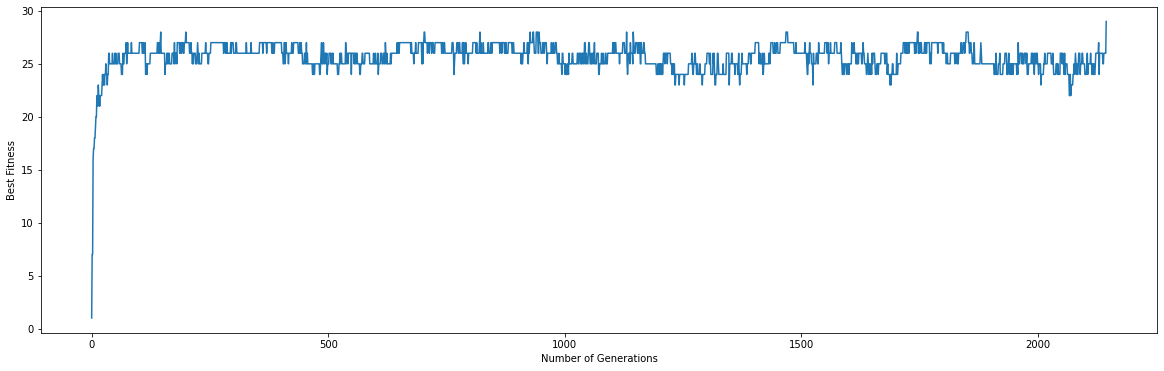

In [21]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)
plt.plot(q.fit_graph)
plt.xlabel('Number of Generations')
plt.ylabel('Best Fitness')
plt.show()

In [17]:
n=0
ch = 0
for i in q.fit_graph:
    if i<ch:
        n += 1
    ch = i
print(n)

375


In [18]:
(2154-375)*100/2154

82.59052924791087

In [4]:
class Improved_Queens():
    def __init__(self, popl_size):
        self.popl_size = popl_size
        self.population = self.generate_popl()
        self.fitness_popl = self.generate_fit()
        self.delta_fit = 0
        self.best_fit = max(self.fitness_popl)
        self.fit_graph = [self.best_fit]
        self.num_gen = 0

    def fitness(self, state):
        cost = 0
        for i in range(8):
            for j in range(8):
                if state[i]==state[j] and i!=j:
                    cost += 1
                if (i-j)==(int(state[i])-int(state[j])) and i!=j:
                    cost += 1
                if (j-i)==(int(state[i])-int(state[j])) and i!=j:
                    cost += 1
        return 29-(cost/2)

    def generate_popl(self):
        row = random.randint(0,7)
        state = str(row)*8
        population = [state]*self.popl_size
        return population
        # population = []
        # for i in range(self.popl_size):
        #     possible_places = '01234567'
        #     state = ''.join(random.choice(possible_places) for i in range(8))
        #     population.append(state)
        # return population
    
    def generate_fit(self):
        fitness_popl = [self.fitness(i) for i in self.population]
        return fitness_popl

    def one_crossover(self, mom, dad):
        c = random.randint(1,7)
        son = mom[:c] + dad[c:]
        daughter = dad[:c] + mom[c:]
        return son, daughter

    def two_crossover(self, mom, dad):
        c_1, c_2 = random.sample(range(8), 2)
        c1 = min(c_1, c_2)
        c2 = max(c_1, c_2)
        son = mom[:c1] + dad[c1:c2] + mom[c2:]
        daughter = dad[:c1] + mom[c1:c2] + dad[c2:]
        return son, daughter

    def super_crossover(self, mom, dad):
        if random.randint(0,10)<8:
            return self.one_crossover(mom, dad)
        else:
            return self.two_crossover(mom, dad)

    def mutate(self, child):
        c = random.randint(0,7)
        row = int(child[c])
        num = list(range(0,8))
        num.remove(row)
        rep = random.choice(num)
        child = child[:c] + str(rep) +child[c+1:]
        return child
    
    def super_mutate(self, child, order):
        order = order-5
        if order>1:
            for _ in range(order):
                child = self.mutate(child)
        else:
            child = self.mutate(child)
        return child

    def super_selection(self):
        # parents = random.choices(self.population, weights=self.fitness_popl, k=2)
        parents = self.tour_selection()
        # parents = self.stochastic_us()
        return parents

    def tour_selection(self):
        tournament = random.sample(self.population, k=self.popl_size//20)
        tournament.sort(key=self.fitness, reverse=True)
        return tournament[0], tournament[1]

    def stochastic_us(self):
        f = 0
        cum_fit = [f+i for i in self.fitness_popl]
        d = cum_fit[-1]/2
        p1 = random.uniform(0, d)
        p2 = p1 + d
        parents = []
        for i in range(self.popl_size):
            if cum_fit[i]>=p1:
                parents.append(self.population[i])
            elif cum_fit[i]>=p2:
                parents.append(self.population[i])
        return parents
    
    def terminate(self):
        if max(self.fitness_popl)==29:
            return True
        elif self.delta_fit==30:
            return True
        else: return False

    def n_repetition(self, state):
        choose = '01234567'
        for i in state:
            choose = choose.replace(i,'')
        return len(choose)

    def genetic_algo(self):
        f = open("out.txt", "a")
        f.truncate(0)
        while (not self.terminate()):
            new_popl = []

            for i in range(self.popl_size):
                mom, dad = self.super_selection()
                son, daughter = self.super_crossover(mom, dad)
                o_son = self.n_repetition(son)
                o_daughter = self.n_repetition(daughter)
                
                if random.randint(0,7) < o_son+2:
                    son = self.super_mutate(son, o_son)
                if random.randint(0,7) < o_daughter+2:
                    daughter = self.super_mutate(daughter, o_daughter)
                new_popl.append(son)
                new_popl.append(daughter)

                f.write(son + ' ' + daughter + ' ')
            new_popl = list(set(new_popl))
            new_popl.sort(key=self.fitness, reverse=True)
            
            if max(new_popl,key=self.fitness)==max(self.population,key=self.fitness):
                self.delta_fit += 1
            else:
                self.delta_fit = 0
            self.population = new_popl[:self.popl_size]
            
            f.write("\n")
            self.fitness_popl = self.generate_fit()
            self.best_fit = max(self.fitness_popl)
            self.fit_graph.append(self.best_fit)
            self.num_gen += 1
        f.close() 
        return max(self.population, key=self.fitness)

In [5]:
q = Improved_Queens(1000)

In [6]:
sol = q.genetic_algo()
print(sol)
print(q.num_gen)

53047162
4


In [7]:
print(q.fit_graph)

[1.0, 14.0, 25.0, 28.0, 29.0]


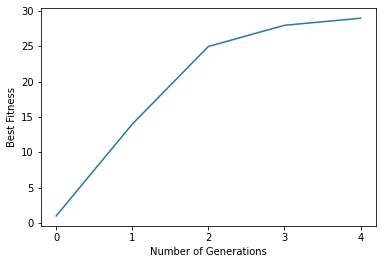

In [8]:
plt.plot(q.fit_graph)
plt.xlabel('Number of Generations')
plt.ylabel('Best Fitness')
plt.xticks(range(0,5))
plt.show()

In [42]:
generations = []
b_fit = []
for i in range(10):
    q = Improved_Queens(1000)
    sol = q.genetic_algo()
    generations.append(q.num_gen)
print(generations)

[2, 2, 2, 3, 2, 2, 3, 2, 2, 2]


In [19]:
print(sum(generations)/200)

5.195


In [21]:
freq = np.zeros(20)
for i in generations:
    freq[i] += 1
print(freq)

[  0.   0.   0.   0.  37. 103.  49.   7.   3.   1.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]


In [15]:
avg = 0
for i in generations:
    if i<80:
        avg += i
print(avg/192)

25.671875


In [16]:
min(generations)

6

In [17]:
max(generations)

134